In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,root_mean_squared_error

In [2]:
df= pd.read_csv("autos_mpg.csv")

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [6]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [7]:
df[df["horsepower"] == "?"]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [8]:
df.replace("?", np.nan, inplace=True)

In [9]:
if 'horsepower' in df.columns:
    df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

In [10]:
df.dropna(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car_name      392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [12]:
df.drop(columns=['car_name'], inplace=True)

In [13]:
# EDA

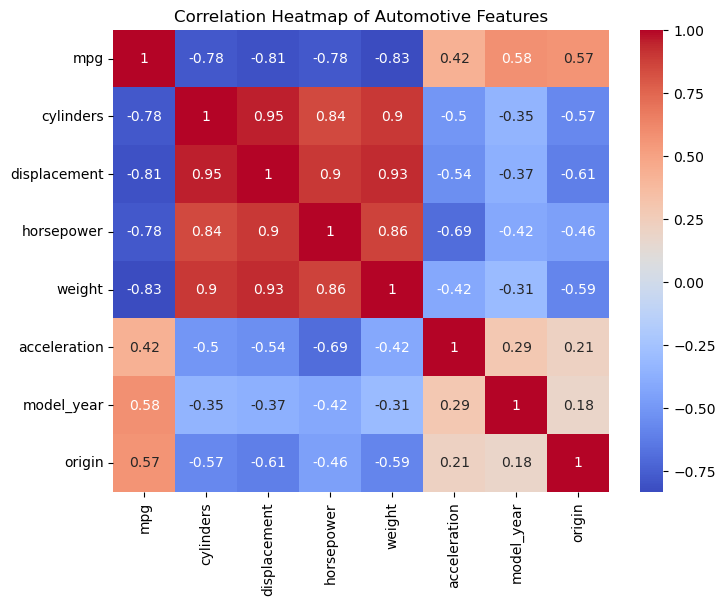

In [14]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Automotive Features")
plt.show()


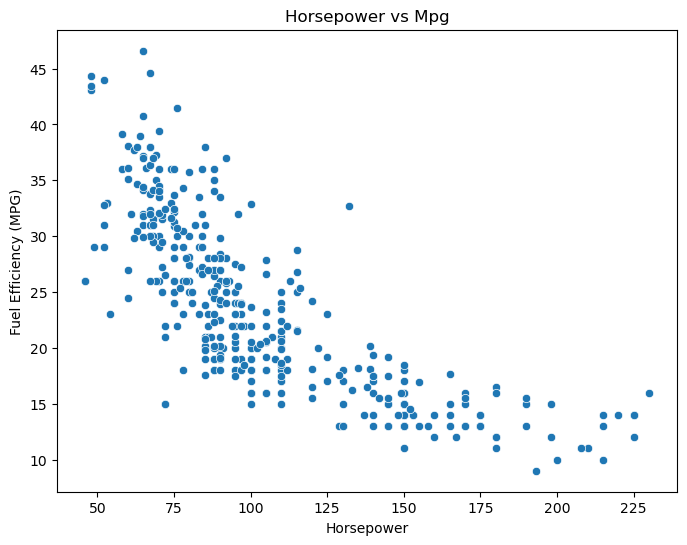

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="horsepower",y="mpg",data=df)
plt.title("Horsepower vs Mpg")
plt.xlabel("Horsepower")
plt.ylabel("Fuel Efficiency (MPG)")
plt.show()

In [16]:
# Train and Test

X= df.drop("mpg",axis=1)
y= df["mpg"]

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [18]:
# Linear Regression 
lr_model= LinearRegression()
lr_model.fit(X_train,y_train)
y_pred_lr= lr_model.predict(X_test)

In [19]:
# Random Forest Regression
rf_model= RandomForestRegressor()
rf_model.fit(X_train,y_train)
y_pred_rf=rf_model.predict(X_test)

In [20]:
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\n🔹 {model_name} Performance:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")
    return mae, rmse, r2

In [23]:
mae_lr, rmse_lr, r2_lr = evaluate_model(y_test, y_pred_lr, "Linear Regression")
mae_rf, rmse_rf, r2_rf = evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")


🔹 Linear Regression Performance:
Mean Absolute Error (MAE): 2.42
Root Mean Squared Error (RMSE): 3.27
R² Score: 0.79

🔹 Random Forest Regressor Performance:
Mean Absolute Error (MAE): 1.76
Root Mean Squared Error (RMSE): 2.47
R² Score: 0.88


In [29]:
comparison= pd.DataFrame({"Model" :["Linear Regression","Random forest Regression"],
                          "MAE" :[mae_lr,mae_rf],
                          "RMSE" :[rmse_lr,rmse_rf],
                          "R2 Score" :[r2_lr,r2_rf]  })
print(f"Model Comparison: \n {comparison}")

Model Comparison: 
                       Model       MAE      RMSE  R2 Score
0         Linear Regression  2.419780  3.272746  0.790150
1  Random forest Regression  1.760608  2.466391  0.880819


In [30]:
importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\n🌟 Feature Importance (Random Forest):")
print(importance)


🌟 Feature Importance (Random Forest):
displacement    0.446545
horsepower      0.161146
cylinders       0.130704
weight          0.127878
model_year      0.102877
acceleration    0.026788
origin          0.004062
dtype: float64


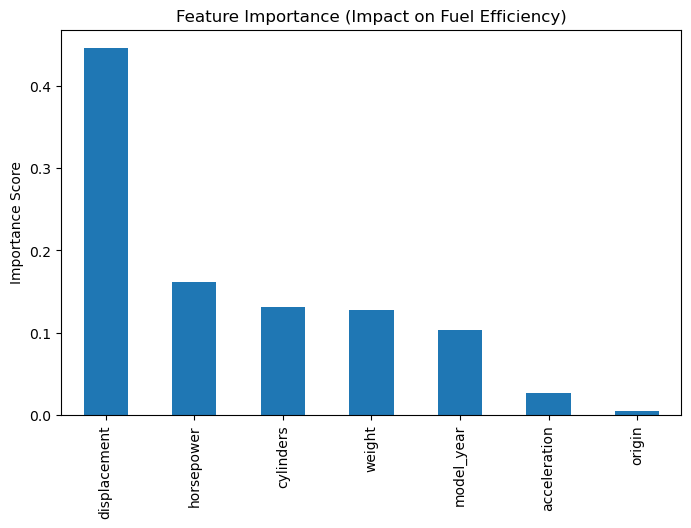

In [31]:
# Plot feature importance
plt.figure(figsize=(8,5))
importance.plot(kind='bar')
plt.title("Feature Importance (Impact on Fuel Efficiency)")
plt.ylabel("Importance Score")
plt.show()

In [32]:
print("\n✅ Project Summary:")
print("• Both Linear Regression and Random Forest models were trained.")
print(f"• Linear Regression R² Score: {r2_lr:.2f}")
print(f"• Random Forest R² Score: {r2_rf:.2f}")
print("• Random Forest performed better overall with lower error and higher accuracy.")
print("• Key factors influencing fuel efficiency include horsepower, weight, and displacement.")



✅ Project Summary:
• Both Linear Regression and Random Forest models were trained.
• Linear Regression R² Score: 0.79
• Random Forest R² Score: 0.88
• Random Forest performed better overall with lower error and higher accuracy.
• Key factors influencing fuel efficiency include horsepower, weight, and displacement.


<div style="background-color:#eaf2f8; border-left:6px solid #2980b9; border-radius:10px; padding:20px; font-size:110%;">

  <h3 style="color:#1a5276;">🚗 Project Insights: Fuel Efficiency Prediction</h3>

  <p style="color:#154360;">
    The project revealed that <b>fuel efficiency strongly depends on vehicle weight, horsepower, and engine displacement</b>. 
    The <b>Random Forest Regressor</b> achieved higher accuracy (<b>R² = 0.88</b>) compared to <b>Linear Regression (R² = 0.79)</b>, 
    indicating that <b>non-linear models capture complex relationships more effectively</b>.
  </p>

  <ul style="color:#1b2631; line-height:1.6;">
    <li><b>Key Factors:</b> Vehicle weight, horsepower, and engine displacement significantly affect fuel efficiency.</li>
    <li><b>Model Comparison:</b> Random Forest performed better than Linear Regression (0.88 vs 0.79 R²).</li>
    <li><b>Insights:</b> Lighter, lower-horsepower, and newer vehicles tend to achieve higher MPG (fuel efficiency).</li>
    <li><b>Conclusion:</b> Using non-linear models helps uncover deeper patterns in automotive performance data.</li>
  </ul>

</div>
